In [42]:
file_path = "/Users/iananderson/Desktop/MagneyLab/test_plot_output_fixed.csv"

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

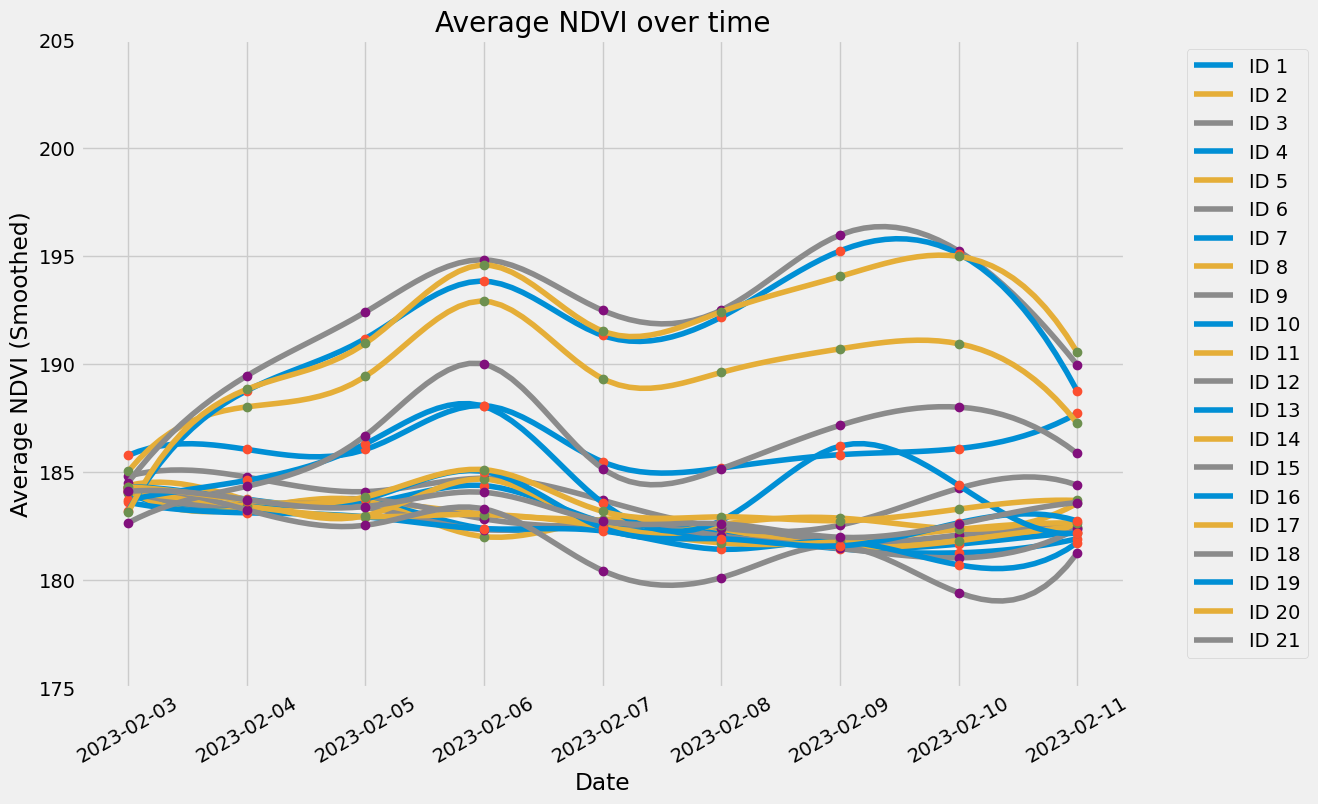

In [43]:
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import CubicSpline

# Specify the file path

# Read the data into a pandas DataFrame
data_df = pd.read_csv(file_path, parse_dates=['Date'])
data_df = data_df[data_df['Date'] <= '2023-02-11']
# Create a figure and axis for the plot with a larger figsize
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the unique IDs, plotting each ID's data
for id, group in data_df.groupby('ID'):
    # Calculate the mean of Average NDVI for each date
    group = group.groupby('Date')['Average NDVI'].mean().reset_index()
    
    # Sort the group data by date
    group = group.sort_values(by='Date')
    
    # Convert the dates to numeric values for the spline interpolation
    date_numeric = group['Date'].map(mdates.date2num)
    
    # Create a CubicSpline
    spline = CubicSpline(date_numeric, group['Average NDVI'])
    
    # Generate a set of equally spaced points for the smoothed curve
    date_range = np.linspace(date_numeric.min(), date_numeric.max(), len(date_numeric) * 10)
    
    # Compute the smoothed NDVI values using the spline function
    smoothed_ndvi = spline(date_range)
    
    # Plot the smoothed curve
    ax.plot(mdates.num2date(date_range), smoothed_ndvi, label=f'ID {id}')
    
    # Plot the original data points as markers
    ax.plot(group['Date'], group['Average NDVI'], marker='o', linestyle='None')

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#mpl.rcParams['axes.prop_cycle'] = cycler(color=plt.get_cmap('tab10').colors)
#mpl.rcParams['font.family'] = 'Roboto'
# Rotate the x-axis labels for better readability
plt.xticks(rotation=30)
plt.style.use('fivethirtyeight')
# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Average NDVI (Smoothed)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Set the y-axis range from 0 to 215
ax.set_ylim(175, 205)
ax.set_title('Average NDVI over time')
# Show the plot
plt.show()